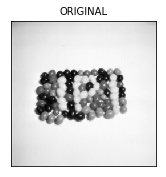

In [2]:
#from skimage import data
#from skimage.feature import match_template
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2
import pywt
import pywt.data
#import skimage



# Load image
titles = ['ORIGINAL', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

#original = pywt.data.camera()
original = cv2.imread('SIPI_Jelly_Beans_4.1.07.jpg',0)
#print(original)

storedValues = list()
z = 0
img=original
#LH=HL=HH=0
coeff2=pywt.dwt2(img,'haar')
LL,(LH,HL,HH)=coeff2
coeff3=pywt.dwt2(LL,'haar')   
LL1,(LH1,HL1,HH1)=coeff3  
coeff33=pywt.dwt2(LL1,'haar')   
LL11,(LH11,HL11,HH11)=coeff33  
coeff34=pywt.dwt2(LL11,'haar')   
LL12,(LH12,HL12,HH12)=coeff34  

fig = plt.figure(figsize=(12, 3))

Uh1, sh1, Vh1 = np.linalg.svd(LL12)

for i, a in enumerate([original]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])


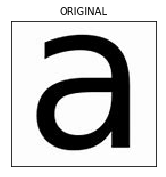

In [3]:
wtr = cv2.imread('qr_new.png',cv2.IMREAD_GRAYSCALE)
#print(wtr.shape)
new=wtr[50:178,50:178]
fig = plt.figure(figsize=(12, 3))

fin=new

#resized = cv2.resize(wtr, dim, interpolation = cv2.INTER_AREA)
coeff4=pywt.dwt2(fin,'haar')
LL3,(LH3,HL3,HH3)=coeff4
coeff5=pywt.dwt2(LL3,'haar')
LL4,(LH4,HL4,HH4)=coeff5
coeff51=pywt.dwt2(LL4,'haar')
LL41,(LH41,HL41,HH41)=coeff51
#print(LL41.shape)
'''coeff52=pywt.dwt2(LL41,'haar')
LL42,(LH42,HL42,HH42)=coeff52'''

   
Uh2, sh2, Vh2 = np.linalg.svd(LL41)
dd=sh1
sh1=sh2*0.01+sh1
#print(sh1.shape)
sh5=np.diag(sh1)
#print(sh5.shape)
inverse= np.dot(Uh1,np.dot(sh5,Vh1))
#cv2.imshow("watermark",inverse)
#print(inverse.shape)
for i, a in enumerate([new]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])





In [4]:
import math

def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

#psnr(LL41,inverse)
#result = match_template(image, coin)


(256, 256)


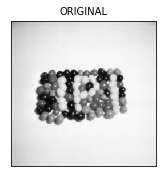

In [5]:
coeff7=inverse,(LH12,HL12,HH12)

inv1=pywt.idwt2(coeff7,'haar')

coeff8=inv1,(LH11,HL11,HH11)

inv2=pywt.idwt2(coeff8,'haar')

coeff9=inv2,(LH1,HL1,HH1)

inv3=pywt.idwt2(coeff9,'haar')

coeff10= inv3,(LH,HL,HH)
extract=pywt.idwt2(coeff10,'haar')
print(extract.shape)
size=256
'''kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

# applying the kernel to the input image
extract = cv2.filter2D(extract, -1, kernel_motion_blur)'''
fig = plt.figure(figsize=(12, 3))



for i, a in enumerate([extract]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

#print((coef[0]))




In [6]:
psnr(original,extract)

47.63845024259751

In [7]:
coeff2=pywt.dwt2(extract,'haar')
LL,(LH,HL,HH)=coeff2
coeff2=pywt.dwt2(LL,'haar')
LL,(LH,HL,HH)=coeff2
coeff2=pywt.dwt2(LL,'haar')
LL,(LH,HL,HH)=coeff2
coeff2=pywt.dwt2(LL,'haar')
LL,(LH,HL,HH)=coeff2
Uh3, sh3, Vh3 = np.linalg.svd(LL)
sh3=(sh3-dd)/0.01
#print(sh3.shape)
sh3=np.diag(sh3)
#print(sh3.shape)
inv= np.dot(Uh2,np.dot(sh3,Vh2))


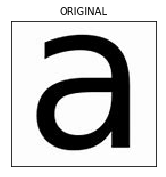

In [57]:
coeff7=inv,(LH41,HL41,HH41)

inv2=pywt.idwt2(coeff7,'haar')

coeff9=inv2,(LH4,HL4,HH4)

inv3=pywt.idwt2(coeff9,'haar')
coeff55=inv3,(LH3,HL3,HH3)

inv4=pywt.idwt2(coeff55,'haar')
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([inv4]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
 

In [11]:
psnr(new,inv4)
#print(psnr(LL41,inv))

255.33331449069556